In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Fuel_Consumption_2000-2022.csv")
data=data.dropna(axis=0)
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION CITY,HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
label_encoder = LabelEncoder()
data['MAKE'] = label_encoder.fit_transform(data['MAKE'])
data['VEHICLE CLASS'] = label_encoder.fit_transform(data['VEHICLE CLASS'])
data['FUEL'] = label_encoder.fit_transform(data['FUEL'])
data['TRANSMISSION']=label_encoder.fit_transform(data['TRANSMISSION'])


In [ ]:
X=data[['YEAR', 'MAKE', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL']]
Y=data['COMB (L/100 km)']


In [ ]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
# Model Training

#Linear Regression
model_leg=LinearRegression()
model_leg.fit(x_train,y_train)
y_pred=model_leg.predict(x_test)
y_pred

array([ 7.57238829, 14.30172254, 13.12935135, ..., 11.18558263,
        8.3322771 , 10.54792304])

In [ ]:
#Decision Tree
model_dec=DecisionTreeRegressor()
model_dec.fit(x_train,y_train)
y_dec_pred=model_dec.predict(x_test)
y_dec_pred

array([ 7.76666667, 14.        , 14.7       , ..., 11.9       ,
        7.1       , 10.25      ])

In [ ]:
# Random Forest
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)
y_rf_pred=model_rf.predict(x_test)
y_rf_pred

array([ 7.741025  , 14.223     , 14.0471    , ..., 10.681     ,
        7.28736667, 10.2447652 ])

In [ ]:
#Gradient Boosting
model_gbr=GradientBoostingRegressor(n_estimators=100)
model_gbr.fit(x_train,y_train)
y_gbr_pred=model_gbr.predict(x_test)
y_gbr_pred

array([ 7.62824758, 13.88763467, 12.92944074, ..., 11.5005555 ,
        7.45665875, 10.35759883])

In [ ]:
#Model Evaluation

#linear
mse_lr=mean_squared_error(y_test,y_pred)
r2score_lr=r2_score(y_test,y_pred)
print("Linear Regression Mean Squraed Error:",mse_lr)
print("Linear Regression r2 Score",r2score_lr)

#Decision Tree
mse_dec=mean_squared_error(y_test,y_dec_pred)
r2score_dec=r2_score(y_test,y_dec_pred)
print("Decison Tree Mean Squared error:",mse_dec)
print("Decison Score R2 Score:",r2score_dec)

#random Forest
mse_rf=mean_squared_error(y_test,y_rf_pred)
r2score_rf=r2_score(y_test,y_rf_pred)
print("Random Forest Mean Squared error:",mse_rf)
print("Random Forest R2 Score:",r2score_rf)

#Gradient Boosting
r2score_gbr=r2_score(y_test,y_gbr_pred)
mse_gbr=mean_squared_error(y_test,y_gbr_pred)
print("Gradient Boosting Mean Squared error:",mse_gbr)
print("Gradient Boosting R2 Score:",r2score_gbr)

Linear Regression Mean Squraed Error: 2.3887087952427546
Linear Regression r2 Score 0.7149756297600083
Decison Tree Mean Squared error: 0.44009736156479434
Decison Score R2 Score: 0.9474869127730826
Random Forest Mean Squared error: 0.34941888241914154
Random Forest R2 Score: 0.9583068069620616
Gradient Boosting Mean Squared error: 0.9682848204695351
Gradient Boosting R2 Score: 0.8844627810150356


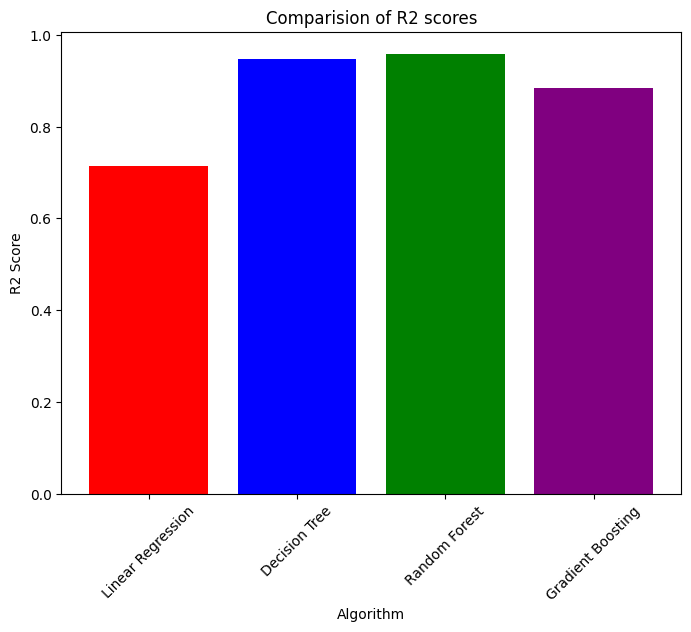

Text(0, 0.5, 'MSE Score')

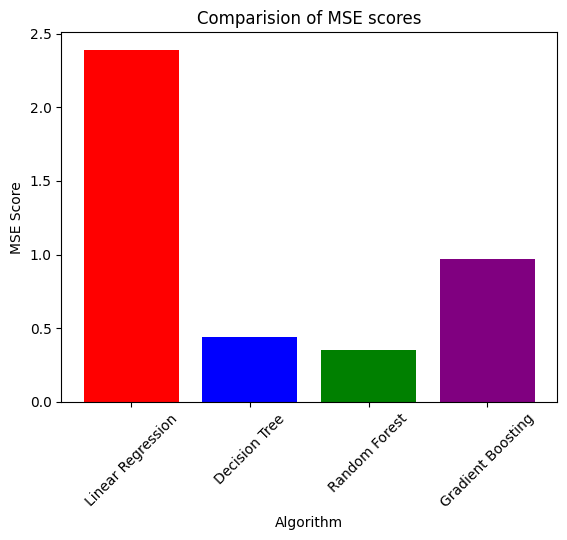

In [ ]:
#Data Visualization
plt.figure(figsize=(8,6))
r2_scores = [r2score_lr, r2score_dec, r2score_rf, r2score_gbr]
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
plt.bar(labels, r2_scores, color=['red', 'blue', 'green', 'purple'])
plt.title('Comparision of R2 scores')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('R2 Score')
plt.show()

mse_scores = [mse_lr, mse_dec, mse_rf, mse_gbr]
labels = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
plt.bar(labels, mse_scores, color=['red', 'blue', 'green', 'purple'])
plt.title('Comparision of MSE scores')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.ylabel('MSE Score')